# Análise do aproveitamento dos estudantes da Universidade do Estado do Amazonas
> Aluna: Juliany Raiol

## Introdução

Este dataset contém informações sobre os alunos do que cursaram matérias ofertadas durante o período de 2013 - 2014 na Universidade do Estado do Amazonas (UEA). Inicialmente, considerou-se que havia apenas dados referentes à matérias do ciclo básico, no entanto, após o processo de análise observou-se que há também informações de alunos veteranos.

O objetivo dessa análise é poder verificar quais matérias possuem maior índice de reprovação, bem como, descobrir se há uma ligação entre a origem do aluno e seu desempenho acadêmico.

## Considerações que deseja-se responder com esta análise

1. É possível considerar que alunos provenientes de municípios do interior do Amazonas possuem desempenho menor que outros?
2. Qual a faixa etária dos alunos que entram na universidade por meio do SAES e ainda cursam matérias consideradas do ciclo básico?
3. Há muitos alunos veteranos que ainda cursam matérias consideradas do ciclo básico?
4. A média de reprovação qual nos cursos de Análise e Desenvolvimento de Sistemas e Sistemas de Informação é menor que em cursos de Engenharia?

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
from sklearn.decomposition import PCA as sklearnPCA

In [3]:
dataframe = pd.read_csv('../data/lyceum_2013_2014.csv')
dataframe.head()

,aluno,municipio_nascimento,nome_curso,tipo_ingresso,ano_ingresso,serie,nome_disciplina,nota_final,situacao_hist,perc_presenca,faltas,idade
0,1,Manaus,Análise e Desenvolvimento de Sistemas,SAES,2013,1.0,Algoritmos e Programação,5.17,Rep Nota,0.9200,6.0,17
1,2,Manaus,Análise e Desenvolvimento de Sistemas,SAES,2013,1.0,Comunicação e Expressão,6.00,Aprovado,1.0000,-1.0,17
2,3,Manaus,Análise e Desenvolvimento de Sistemas,SAES,2013,1.0,Cálculo I,2.9,Rep Nota,1.0000,0.0,17
3,4,Manaus,Análise e Desenvolvimento de Sistemas,SAES,2013,1.0,Empreendedorismo,8.50,Aprovado,1.0000,-1.0,17
4,5,Manaus,Análise e Desenvolvimento de Sistemas,SAES,2013,1.0,Introdução à Computação,7.70,Aprovado,0.8667,8.0,17


## Características dos atributos

Os atributos encontrados nesse dataset foram classificados como numérico, norminal e ordinal. Pode-se perceber que a quantidade de atributos nominais é maior que os demais tipos.

Há cerca de 57075 linhas e 15 colunas. As colunas compreendem: <i> aluno</i>, <i>municipio_nascimento</i>, <i>dt_nasc</i>, <i>id_curso</i>, <i>nome_curso</i>, <i>tipo_ingresso</i>, <i>ano_ingresso</i>, <i>unidade_fisica</i>, <i>serie</i>, <i>id_disciplina</i>, <i>nome_disciplina</i>, <i>nota_final</i>, <i>situacao_hist</i>, <i>perc_presenca</i> e <i>faltas</i>.



| Nome da Coluna     |Classificação  |
|:------------------:|:-------------:|
| aluno              |  numérico     |
|municipio_nascimento|  nominal      |  
| nome_curso         |  nominal      |
| tipo_ingresso      |  nominal      |
| ano_ingresso       |  numérico     |
| serie              |  ordinais     |
| nome_disciplina    |  nominal      |
| nota final         |  nominal      |
| situacao_hist      |  nominal      |
| perc_presenca      |  numérico     |
| faltas             |  numérico     |
| idade              |  numérico     |

## Qualidade dos dados

<strong> Precisão: </strong> Os dados mostraram-se imprecisos em certas colunas como, por exemplo, em <i> faltas </i> e <i> perc_presenca</i>, havia situações em que os devidos valores não foram cadastrados, alunos que não possuíam faltas lançadas e percentual de presença era nulo. Em certos casos, os que tinham essas características eram aqueles que foram <i> dispensados</i> da disciplina ou haviam <i>trancado</i> a matéria. Em <i>nota final</i>, em determinados campos, ao invés de nulo, encontrava-se apenas espaço em branco (' ').

<strong>Precisão semântica: </strong> Nas colunas de <i> faltas </i> e <i> perc_presenca</i>, os valore estavam como string e precisariam estar como ponto flutuante. Logo, fora do alcance da precisão semântica.

<strong> Precisão sintática: </strong> Nas coluna de <i>nota final </i>, havia valores representados por espaços vazios (' ').

<strong>Completude</strong>: Havia valores em falta, no entanto, após formação o dataset contém as informações necessárias para análise.

<strong>Pontualidade:</strong> Os dados não são tão antigos. Compreendem o período de 2013 - 2014.

## Visualização dos dados

A seguinte tabela mostra a quantidade de ingressantes na universidade no período de 2013-2014

## 1. Gráficos de uma dimensão

In [53]:
query = dataframe.query("municipio_nascimento == 'Manaus' & ano_ingresso == 2013")
query

,aluno,municipio_nascimento,nome_curso,tipo_ingresso,ano_ingresso,serie,nome_disciplina,nota_final,situacao_hist,perc_presenca,faltas,idade
0,1,Manaus,Análise e Desenvolvimento de Sistemas,SAES,2013,1.0,Algoritmos e Programação,5.17,Rep Nota,0.9200,6.0,17
1,2,Manaus,Análise e Desenvolvimento de Sistemas,SAES,2013,1.0,Comunicação e Expressão,6.00,Aprovado,1.0000,-1.0,17
2,3,Manaus,Análise e Desenvolvimento de Sistemas,SAES,2013,1.0,Cálculo I,2.9,Rep Nota,1.0000,0.0,17
3,4,Manaus,Análise e Desenvolvimento de Sistemas,SAES,2013,1.0,Empreendedorismo,8.50,Aprovado,1.0000,-1.0,17
4,5,Manaus,Análise e Desenvolvimento de Sistemas,SAES,2013,1.0,Introdução à Computação,7.70,Aprovado,0.8667,8.0,17
5,6,Manaus,Análise e Desenvolvimento de Sistemas,SAES,2013,1.0,Lógica para Computação,5.83,Rep Nota,1.0000,-1.0,17
6,7,Manaus,Análise e Desenvolvimento de Sistemas,SAES,2013,2.0,Algoritmos e Programação,8.25,Aprovado,1.0000,-1.0,17
7,8,Manaus,Análise e Desenvolvimento de Sistemas,SAES,2013,2.0,Arquitetura e Organização de Computadores,2.83,Rep Nota,0.8333,10.0,17
8,9,Manaus,Análise e Desenvolvimento de Sistemas,SAES,2013,2.0,Introdução à Internet,8.80,Aprovado,1.0000,0.0,17
9,10,Manaus,Análise e Desenvolvimento de Sistemas,SAES,2013,2.0,Lógica para Computação,5.97,Rep Nota,0.9000,6.0,17


In [4]:
dataframe.groupby('tipo_ingresso')['tipo_ingresso'].count()

tipo_ingresso
Intercâmbio                9
Mand. Seg - SIS           85
Mand. Seg. - Vest        131
Proc. Sel.                98
Proc. Sel. Esp.         8037
Proc. Sel. Mest.          88
Proc.Sel.Doutorado        67
Reopção                  309
SAES                   11762
SIS                     4828
Transf. Facultativa       68
Transf.Ex Officio         70
Vestibular             31523
Name: tipo_ingresso, dtype: int64

A seguinte gráfico mostra a faixa etária dos alunos que cursavam matérias consideradas do ciclo básico e que ingressaram pelo <i>SAES</i>

In [5]:
query = dataframe.query("tipo_ingresso == 'SAES' & ano_ingresso == 2013")

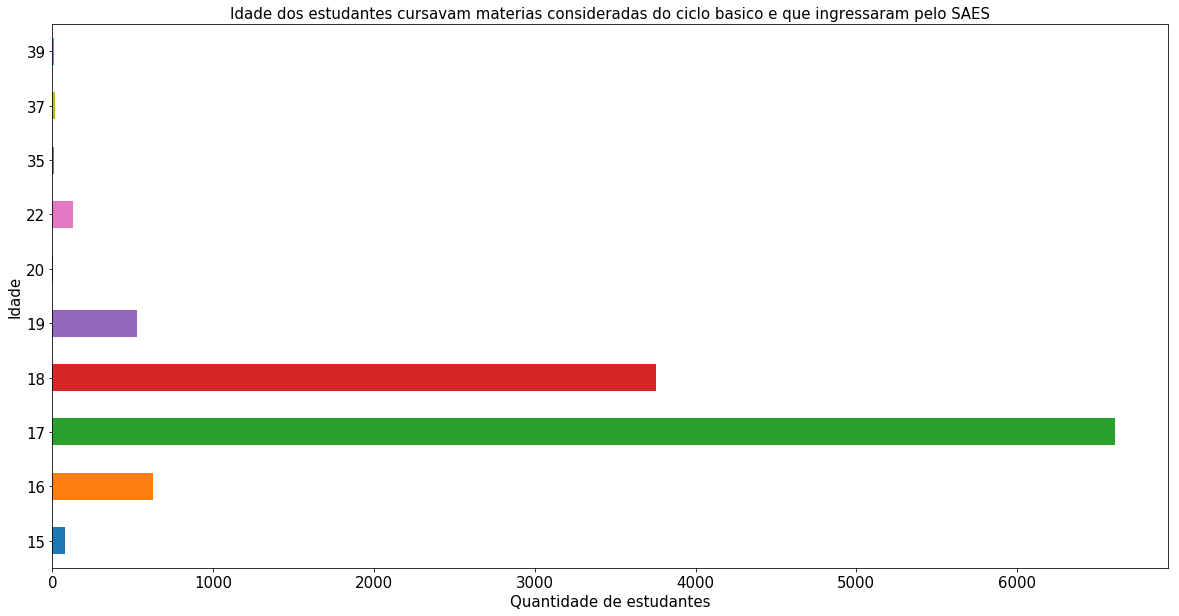

In [6]:
query = dataframe.query("tipo_ingresso == 'SAES'")
query.groupby('idade')['idade'].count().plot(kind='barh', figsize=(20,10), fontsize=15)
plt.title('Idade dos estudantes cursavam materias consideradas do ciclo basico e que ingressaram pelo SAES', fontsize=15)
plt.xlabel('Quantidade de estudantes', fontsize=15)
plt.ylabel('Idade', fontsize=15)
plt.show()

A seguinte gráfico mostra a situação dos alunos calouros referentes à disciplina de Cálculo I no ano de 2013

In [7]:
query = dataframe.query("(tipo_ingresso == 'SAES') & (ano_ingresso == 2013) & (municipio_nascimento == 'Manaus') & ((serie == 1 | serie == 2) & nome_disciplina == 'Cálculo I') ")

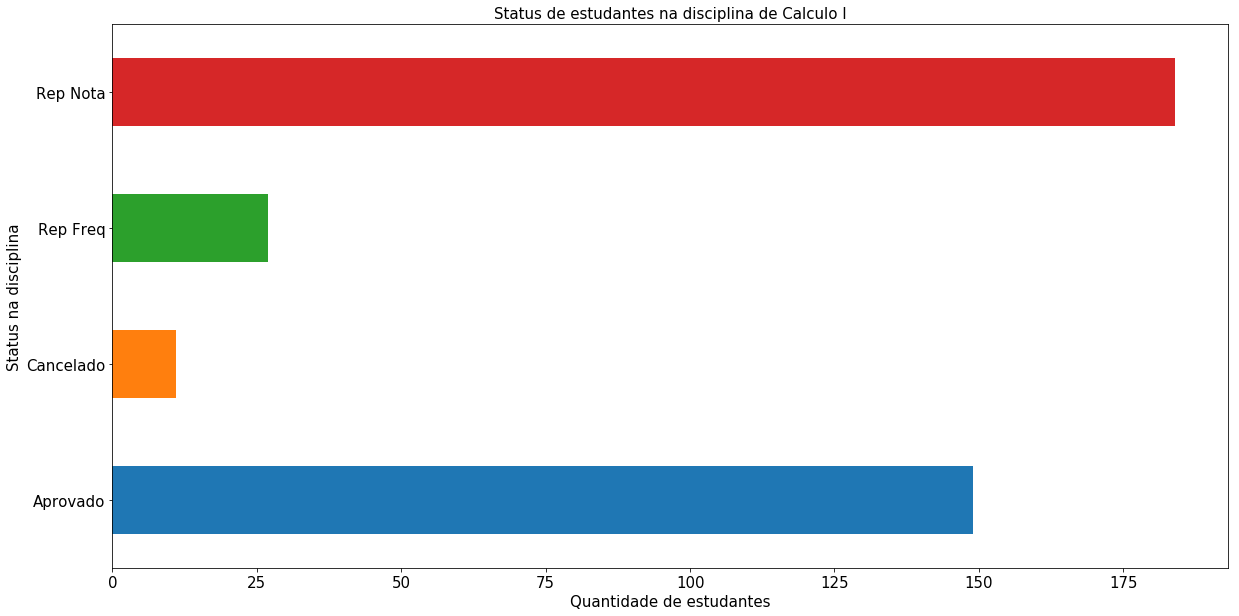

In [8]:
query.groupby('situacao_hist')['situacao_hist'].count().plot(kind='barh', figsize=(20,10), fontsize=15)
plt.title('Status de estudantes na disciplina de Calculo I', fontsize=15)
plt.xlabel('Quantidade de estudantes', fontsize=15)
plt.ylabel('Status na disciplina', fontsize=15)
plt.show()

In [9]:
query = dataframe.query("(ano_ingresso == 2013) & (municipio_nascimento != 'Manaus') & ((serie == 1 | serie == 2)) ")

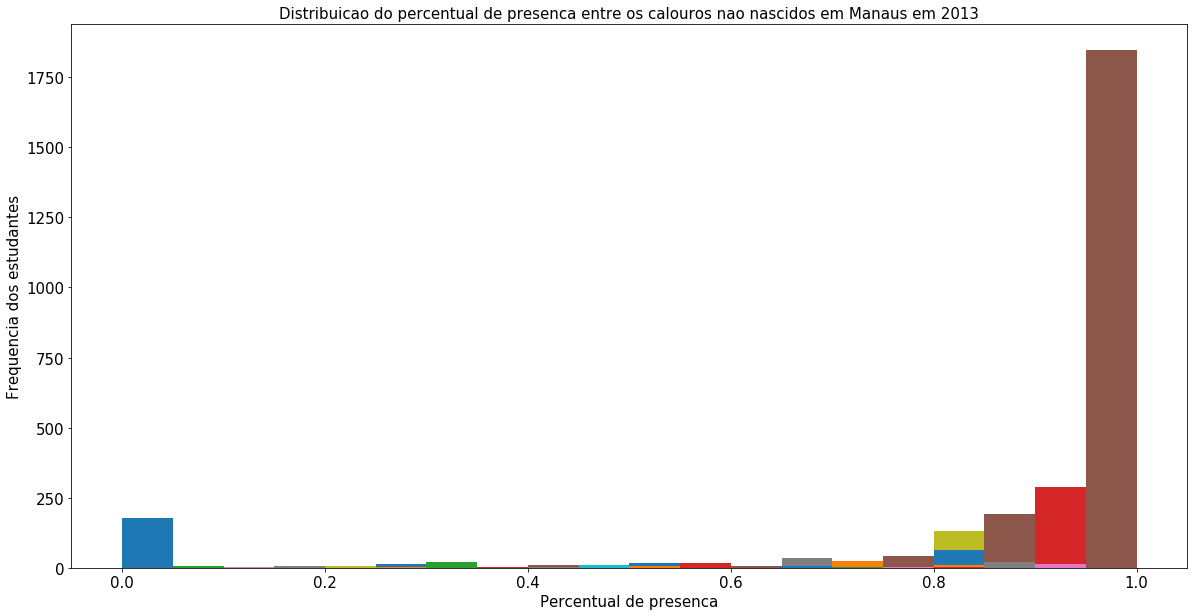

In [10]:
bins = np.arange(0, 1.05, 0.05)
group = query.groupby('perc_presenca')['perc_presenca']
group.plot(kind='hist', figsize=(20,10), fontsize=15, bins=bins)
plt.title('Distribuicao do percentual de presenca entre os calouros nao nascidos em Manaus em 2013', fontsize=15)
plt.xlabel('Percentual de presenca', fontsize=15)
plt.ylabel('Frequencia dos estudantes', fontsize=15)
plt.show()

In [51]:
query = dataframe.query("(ano_ingresso == 2013) & (municipio_nascimento == 'Manaus') & nome_disciplina == 'Cálculo I' & situacao_hist=='Rep Nota'")
notas = [float(nota) for nota in query['nota_final']]
query.head()

,aluno,municipio_nascimento,nome_curso,tipo_ingresso,ano_ingresso,serie,nome_disciplina,nota_final,situacao_hist,perc_presenca,faltas,idade
2,3,Manaus,Análise e Desenvolvimento de Sistemas,SAES,2013,1.0,Cálculo I,2.9,Rep Nota,1.0,0.0,17
22,23,Manaus,Análise e Desenvolvimento de Sistemas,SAES,2013,1.0,Cálculo I,4.7,Rep Nota,1.0,0.0,18
29,30,Manaus,Análise e Desenvolvimento de Sistemas,SAES,2013,2.0,Cálculo I,1.8,Rep Nota,1.0,0.0,18
98,99,Manaus,Análise e Desenvolvimento de Sistemas,SAES,2013,1.0,Cálculo I,4.5,Rep Nota,1.0,0.0,17
103,104,Manaus,Análise e Desenvolvimento de Sistemas,SAES,2013,2.0,Cálculo I,4.6,Rep Nota,1.0,0.0,17


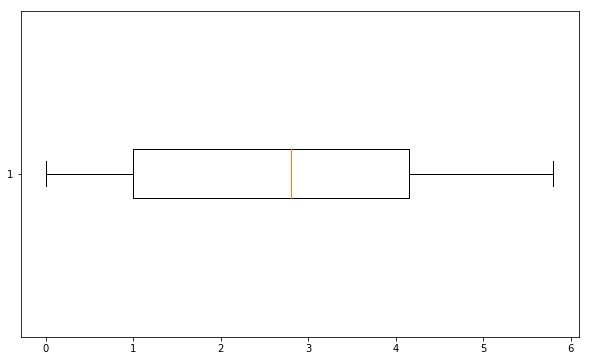

In [50]:
plt.figure(figsize=(10,6))
plt.boxplot(notas, 0, 'rs', 0, 0.75)
plt.show()

## 2. Gráficos de duas dimensões

O seguinte gráfico mostra a relação entre a situação na disciplina de <i>Cálculo I</i> e a quantidade de faltas

In [54]:
query = dataframe.query("(ano_ingresso == 2013) & (municipio_nascimento != 'Manaus') & nome_disciplina == 'Cálculo I'")

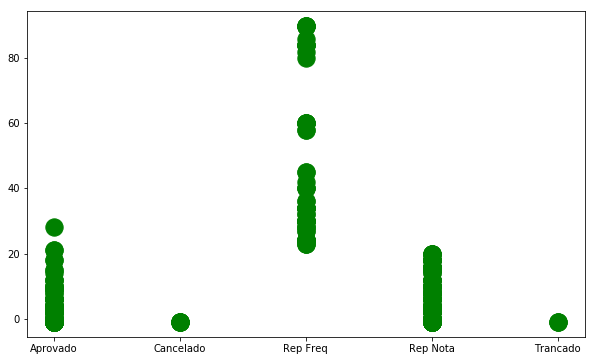

In [55]:
plt.figure(figsize=(10,6))
plt.scatter(query['situacao_hist'], query['faltas'], marker="o", color='green', s=300)
plt.show()

In [56]:
query = dataframe.query("(ano_ingresso == 2013) & (municipio_nascimento == 'Manaus') &  nome_disciplina == 'Cálculo I'")

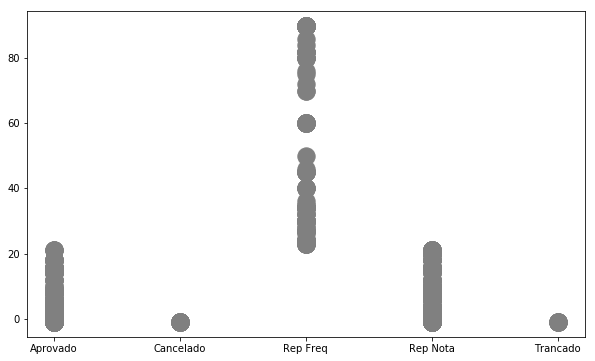

In [57]:
plt.figure(figsize=(10,6))
plt.scatter(query['situacao_hist'], query['faltas'], marker="o", color='gray', s=300)
plt.show()

## 3. Análise de correlação

Medida do grau de interdependência numérica entre duas variáveis aleatórias.

In [15]:
dataframe.cov()

,aluno,ano_ingresso,serie,perc_presenca,faltas,idade
aluno,2.714677e+08,1351.949714,3836.716684,-315.792743,8259.004599,-10491.417283
ano_ingresso,1.351950e+03,0.249942,-0.258956,0.001117,-0.367128,-0.327384
serie,3.836717e+03,-0.258956,7.680950,-0.027427,3.827333,-1.030618
perc_presenca,-3.157927e+02,0.001117,-0.027427,0.068619,-2.576692,-0.095906
faltas,8.259005e+03,-0.367128,3.827333,-2.576692,311.180453,1.996141
idade,-1.049142e+04,-0.327384,-1.030618,-0.095906,1.996141,8218.986087


O coeficiente de correlação de Pearson é uma medida para uma relação linear entre dois atributos numéricos X e Y.

In [16]:
dataframe.corr(method='pearson')

,aluno,ano_ingresso,serie,perc_presenca,faltas,idade
aluno,1.000000,0.164128,0.084022,-0.073168,0.028416,-0.007024
ano_ingresso,0.164128,1.000000,-0.186896,0.008532,-0.041629,-0.007223
serie,0.084022,-0.186896,1.000000,-0.037779,0.078286,-0.004102
perc_presenca,-0.073168,0.008532,-0.037779,1.000000,-0.557615,-0.004038
faltas,0.028416,-0.041629,0.078286,-0.557615,1.000000,0.001248
idade,-0.007024,-0.007223,-0.004102,-0.004038,0.001248,1.000000


Ambas as variáveis devem ser medidas no mínimo em nível ordinal, de forma que seja possível atribuir postos a cada uma das variáveis

In [17]:
dataframe.corr(method='kendall')

,aluno,ano_ingresso,serie,perc_presenca,faltas,idade
aluno,1.000000,0.134011,0.055029,-0.037279,0.018640,0.143425
ano_ingresso,0.134011,1.000000,-0.163998,0.040354,-0.060304,-0.068363
serie,0.055029,-0.163998,1.000000,-0.082026,0.095981,-0.205829
perc_presenca,-0.037279,0.040354,-0.082026,1.000000,-0.767684,-0.020544
faltas,0.018640,-0.060304,0.095981,-0.767684,1.000000,-0.015245
idade,0.143425,-0.068363,-0.205829,-0.020544,-0.015245,1.000000


Se dois ou mais valores coincidirem, sua classificação não está definida.

In [18]:
dataframe.corr(method='spearman')

,aluno,ano_ingresso,serie,perc_presenca,faltas,idade
aluno,1.000000,0.164128,0.069715,-0.050216,0.025211,0.205366
ano_ingresso,0.164128,1.000000,-0.186776,0.044845,-0.068622,-0.077890
serie,0.069715,-0.186776,1.000000,-0.103944,0.124412,-0.268459
perc_presenca,-0.050216,0.044845,-0.103944,1.000000,-0.801840,-0.024859
faltas,0.025211,-0.068622,0.124412,-0.801840,1.000000,-0.020857
idade,0.205366,-0.077890,-0.268459,-0.024859,-0.020857,1.000000
